(472, 72388)


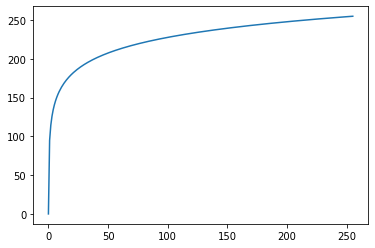

In [2]:
import pylab
from skimage.io import imread
from skimage.filters import gaussian

L = 256  # Número de níveis de cinza
k = 25.  # Parâmetro para ajuste de contraste

root ='/home/marcelo/PV_Cell/' # Caminho para imagens

fnamesF = [] # Nome das imagens PV sem defeito
with open(root+"Sem_Defeito.txt") as f:
 fnamesF = [s.strip() for s in f]

fnamesT = [] # Nome das imagens PV com defeito
with open(root+"Defeito.txt") as f:
 fnamesT =  [s.strip() for s in f]

# Abre arquivos de imagens em coloca em listas separadas
imF = [imread(root+"Sem_Defeito/"+f) for f in fnamesF]
imT = [imread(root+"Defeito/"+f) for f in fnamesT]

# Cria dicionário das imagens com rotulação -1: Sem defeito, 1: Com defeito
im = {-1:imF,1:imT}

# Máscara para regiões de interesse
msk = imread("/home/marcelo/cell_msk.png")

fc = pylab.vectorize(lambda r,k,L: (L-1)*pylab.log2(k*r+1)/pylab.log2(k*(L-1)+1))
# Extrai os dados das regiões de interesse das imagens e 
# formata em l para classificação
rr = pylab.arange(256)
pylab.plot(rr,fc(rr,25.0,256))
l = []
for label,img_list in im.items():
    for im in img_list:
        aux = pylab.uint8(fc(im,k,L))
        aux = gaussian(aux,sigma=3.,preserve_range=True)
        aux = msk & pylab.uint8(aux)
        l.append([label]+aux[pylab.where(aux != 0)].flatten().tolist())
l = pylab.array(l) 
print(l.shape)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

X,y = l[:,1:],l[:,0]
for n in range(60,120,3):
 clf = make_pipeline(PCA(n_components=n,whiten=True),SVC(kernel='linear'))
 #clf = make_pipeline(PCA(n_components=n,whiten=True),SVC(kernel='linear'))
 score = cross_val_score(clf, X,y, cv=StratifiedKFold(n_splits=5,shuffle=True, random_state=1),scoring='f1')
 print(n,pylab.mean(score),pylab.std(score))



60 0.7969096918879834 0.04048982898881725
63 0.7995563835234393 0.04160991848682493
66 0.8015138525776824 0.05591311495326624
69 0.7878365507200309 0.04308801191920783
72 0.7829886029200892 0.048992916874466795
75 0.7785055279536746 0.04021010871467924
78 0.7587750657190385 0.049648744503321976


KeyboardInterrupt: 